In [33]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

![superdense_coding.jpg](https://learning-api.quantum.ibm.com/assets/a9271b68-f6f5-44a4-b9d4-bef8f86921b4?format=auto&quality=80)

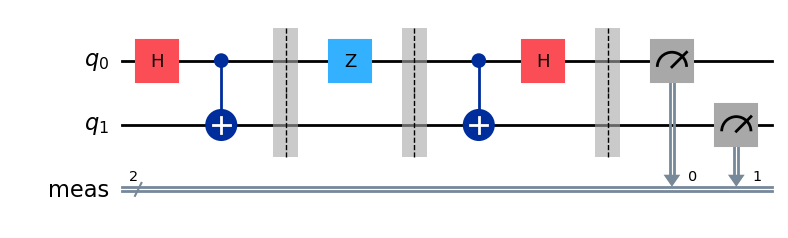

In [34]:
c, d = 0, 1

protocol = QuantumCircuit(2)

protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

if d == 1:
    protocol.z(0)
if c == 1:
    protocol.x(0)
protocol.barrier()

protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()


display(protocol.draw('mpl'))

Measured 01 with frequency 1.0


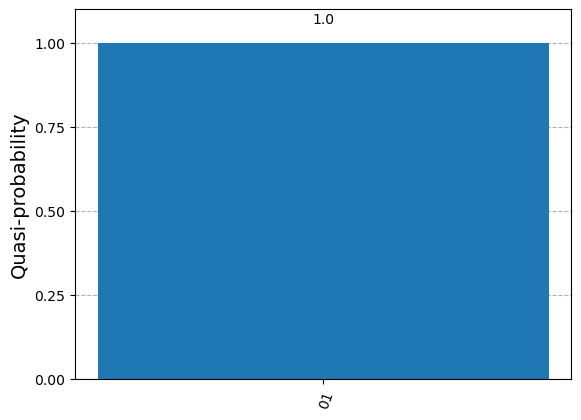

In [42]:
result = Sampler().run(protocol).result()
# print(result.quasi_dists[0].binary_probabilities())
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

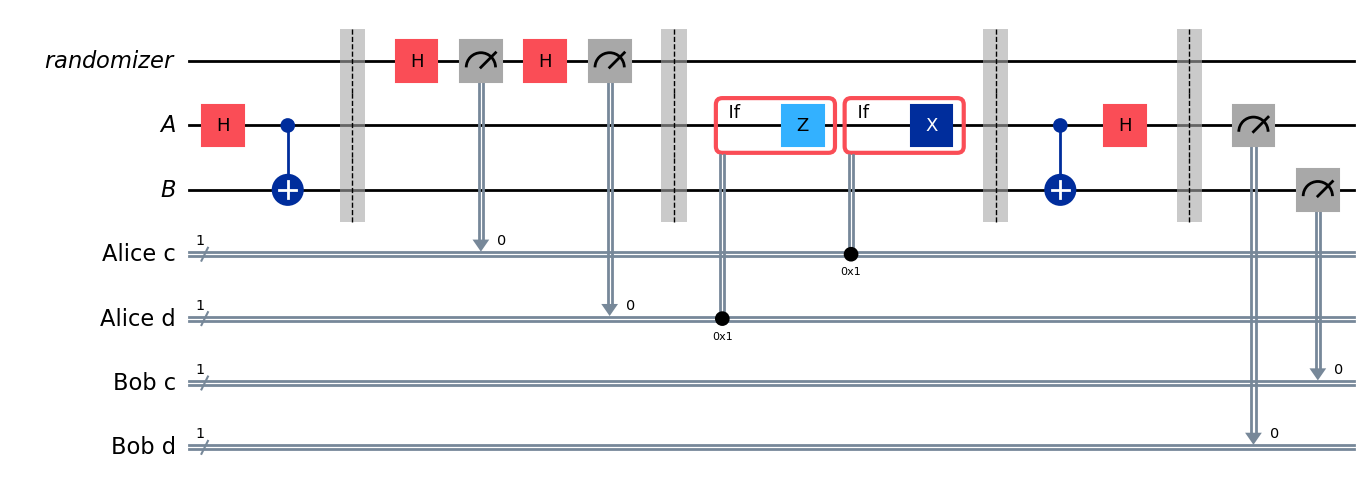

In [28]:
qrand = QuantumRegister(1, "randomizer")
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(qrand, A, B, Alice_c, Alice_d)

test.h(A)
test.cx(A, B)
test.barrier()

test.h(qrand)
test.measure(qrand, Alice_c)
test.h(qrand)
test.measure(qrand, Alice_d)
test.barrier()

with test.if_test((Alice_d, 1)):
    test.z(A)
with test.if_test((Alice_c, 1)):
    test.x(A)
test.barrier()

test.cx(A, B)
test.h(A)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_c)
test.add_register(Bob_d)

test.measure(A, Bob_d)
test.measure(B, Bob_c)

display(test.draw('mpl'))

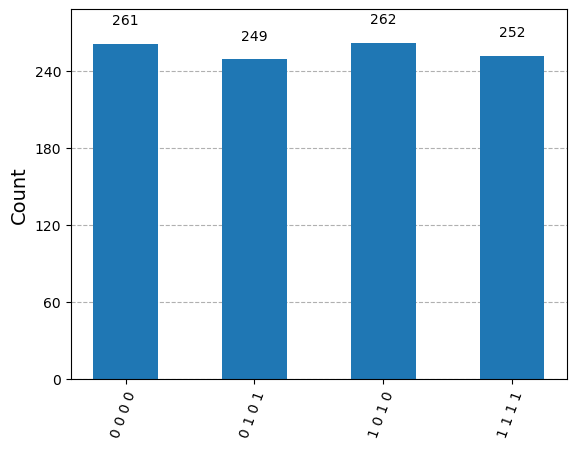

In [32]:
result = AerSimulator().run(test).result()
stats = result.get_counts()
# print(stats)
display(plot_histogram(stats))